In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [2]:
id1 = "318465291"
id2 = "123456789"

In [3]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [4]:
#df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

Please fill your names here:

daniel tugendhaft

# Q1

In [6]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/fitness.csv'
fitness_df = pd.read_csv(url)
fitness_df.head()

,index,Date,Gender,Age,ImportanceExercise,FitnessLevel,Frequency,Barriers,Activity,DoYouDo,Daytime,Unit,Diet,BarriersDiet,SelfRatingDiet,RecommendedFriend,PurchasedEquipment,Motivation
0,0,2019/07/03 11:48:07 PM GMT+5:30,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,1,2019/07/03 11:51:22 PM GMT+5:30,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2,2019/07/03 11:56:28 PM GMT+5:30,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,3,2019/07/04 5:43:35 AM GMT+5:30,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,4,2019/07/04 5:44:29 AM GMT+5:30,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


In [7]:
Cols = ['index','Daytime', 'ImportanceExercise', 'Frequency', 'SelfRatingDiet', 'Gender', 'PurchasedEquipment']
melted_fitness_df = pd.melt(fitness_df[Cols], id_vars = 'index', value_vars = Cols)
melted_fitness_df

,index,variable,value
0,0,Daytime,Early morning
1,1,Daytime,Early morning
2,2,Daytime,Early morning
3,3,Daytime,Evening
4,4,Daytime,Evening
...,...,...,...
3265,540,PurchasedEquipment,Yes
3266,541,PurchasedEquipment,Yes
3267,542,PurchasedEquipment,No
3268,543,PurchasedEquipment,No


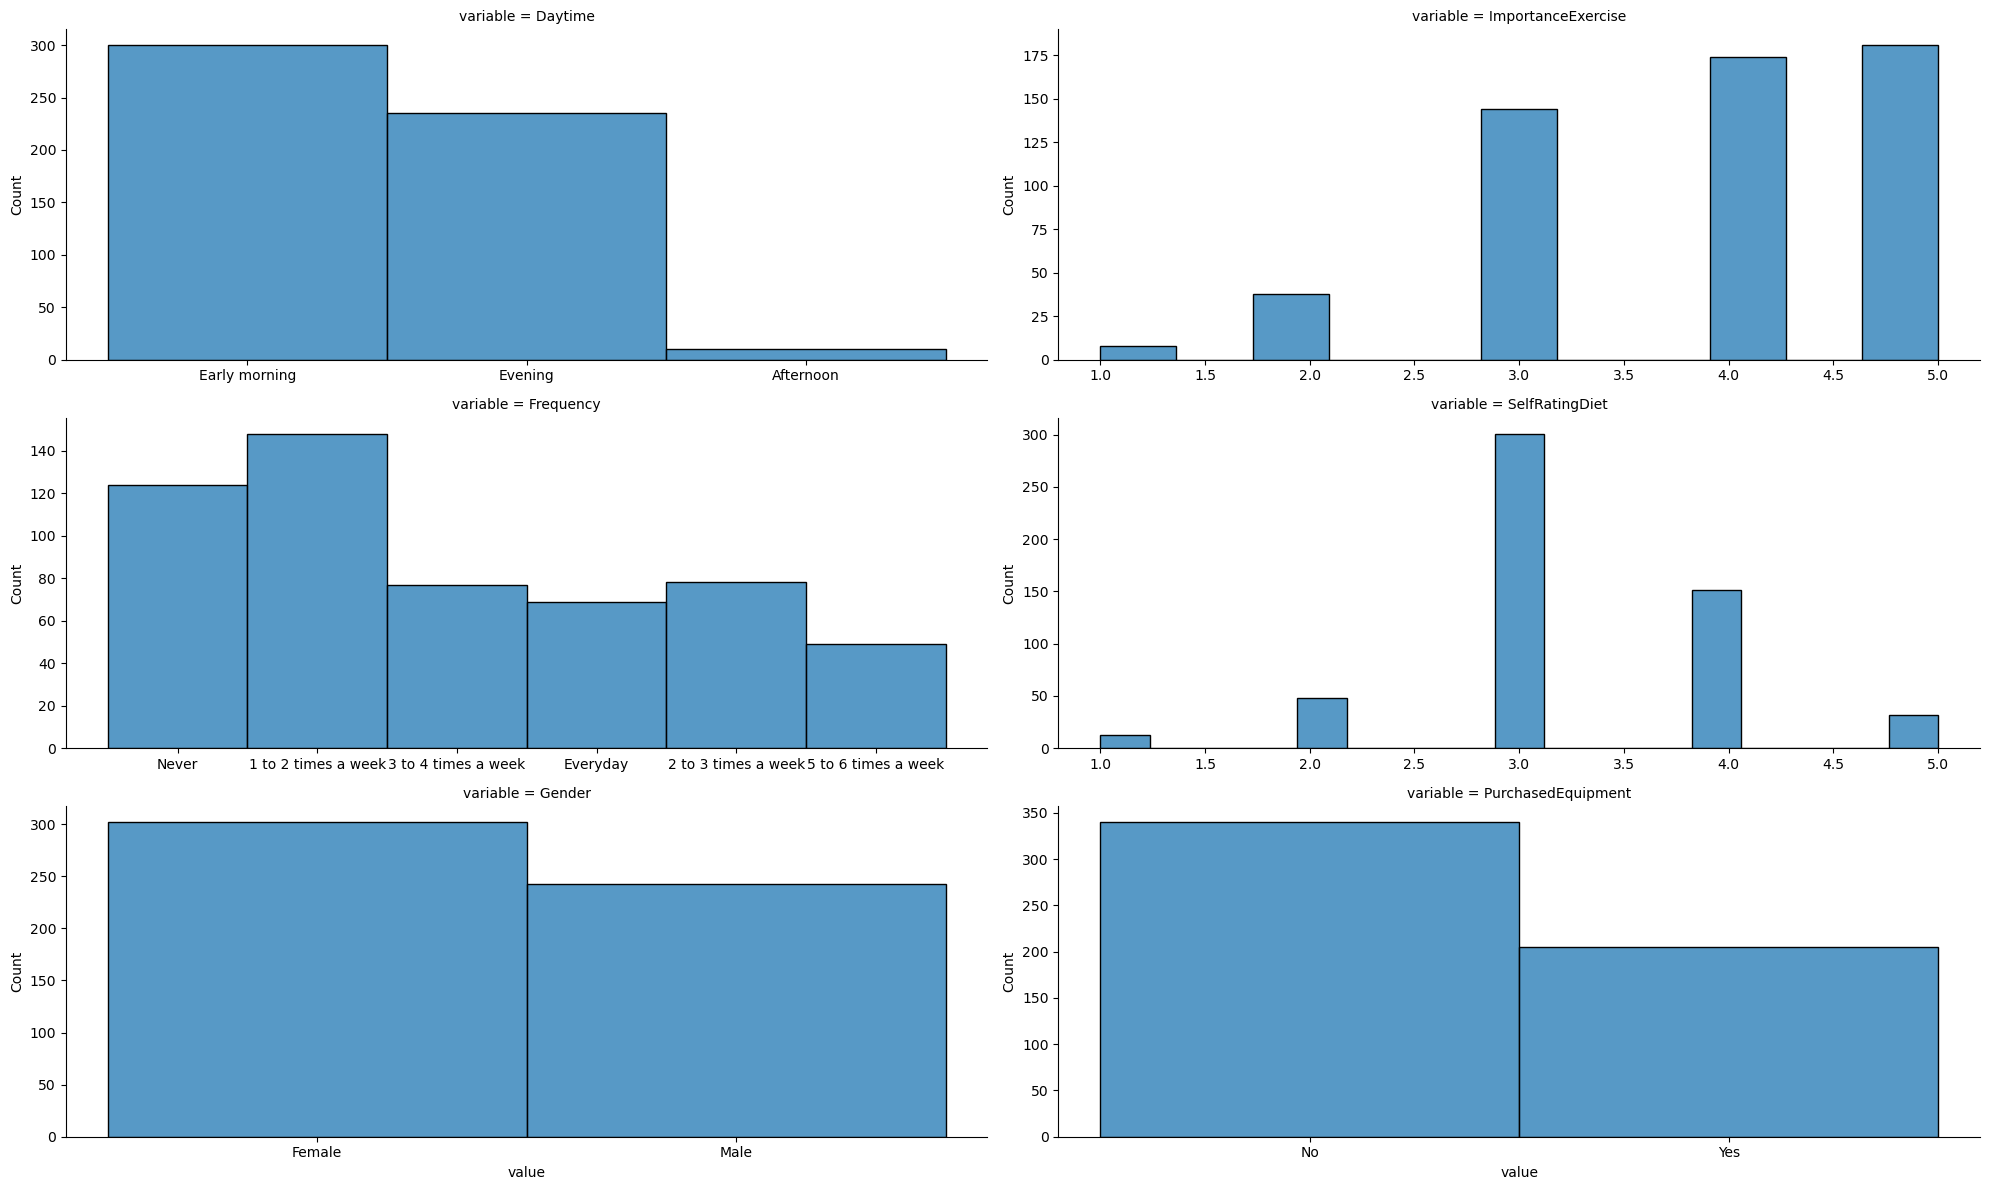

In [8]:
Ans = sns.FacetGrid(data = melted_fitness_df, col="variable",  col_wrap=2, sharex = False, sharey= False, height = 4, aspect=2.5)
Ans.map_dataframe(sns.histplot, x = 'value')
plt.show()

# Q2

In [9]:
Cols = ['Daytime', 'ImportanceExercise', 'Frequency', 'SelfRatingDiet', 'Gender', 'PurchasedEquipment']
Nfitness_df = pd.get_dummies(fitness_df[Cols])

In [10]:
Nfitness_df.head()

,ImportanceExercise,SelfRatingDiet,Daytime_Afternoon,Daytime_Early morning,Daytime_Evening,Frequency_1 to 2 times a week,Frequency_2 to 3 times a week,Frequency_3 to 4 times a week,Frequency_5 to 6 times a week,Frequency_Everyday,Frequency_Never,Gender_Female,Gender_Male,PurchasedEquipment_No,PurchasedEquipment_Yes
0,2,3,0,1,0,0,0,0,0,0,1,1,0,1,0
1,4,4,0,1,0,0,0,0,0,0,1,1,0,1,0
2,3,4,0,1,0,1,0,0,0,0,0,1,0,0,1
3,4,4,0,0,1,0,0,1,0,0,0,1,0,1,0
4,3,4,0,0,1,0,0,0,0,0,1,1,0,1,0


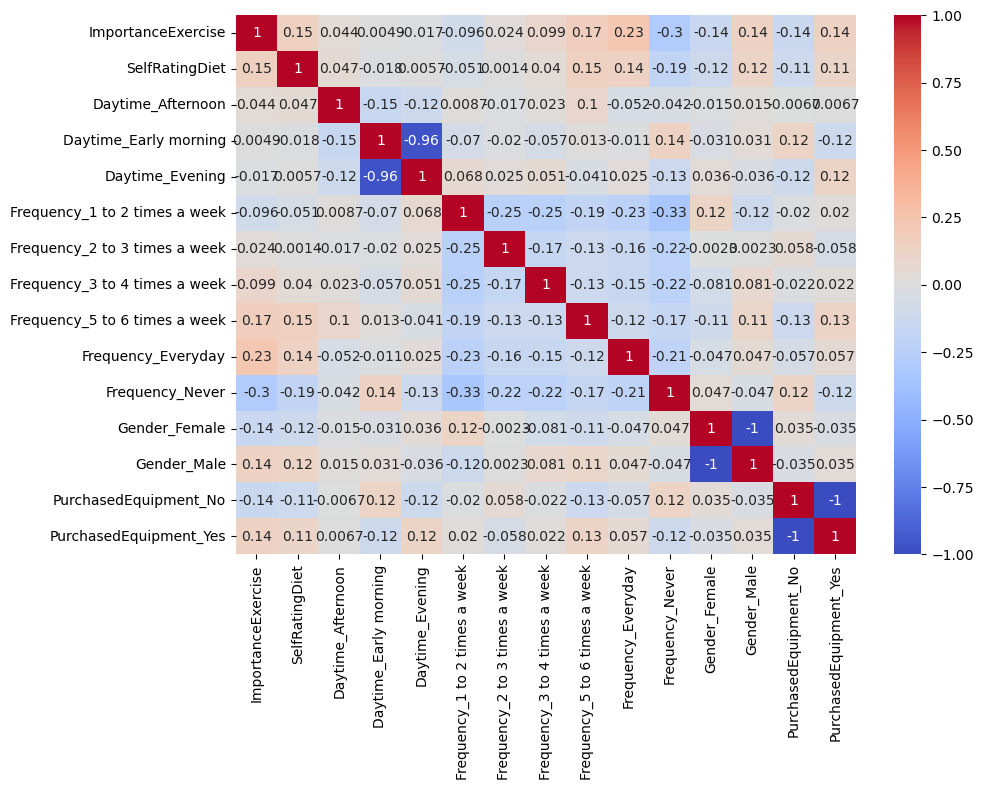

In [11]:
corrs = Nfitness_df.corr(method = 'kendall')
plt.figure(figsize=(10,7))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)
plt.show()

# Q3

In [12]:
Daytime_counts = pd.DataFrame(fitness_df[['Daytime']].value_counts(), columns = ['count'])
Daytime_counts

,count
Daytime,
Early morning,300
Evening,235
Afternoon,10


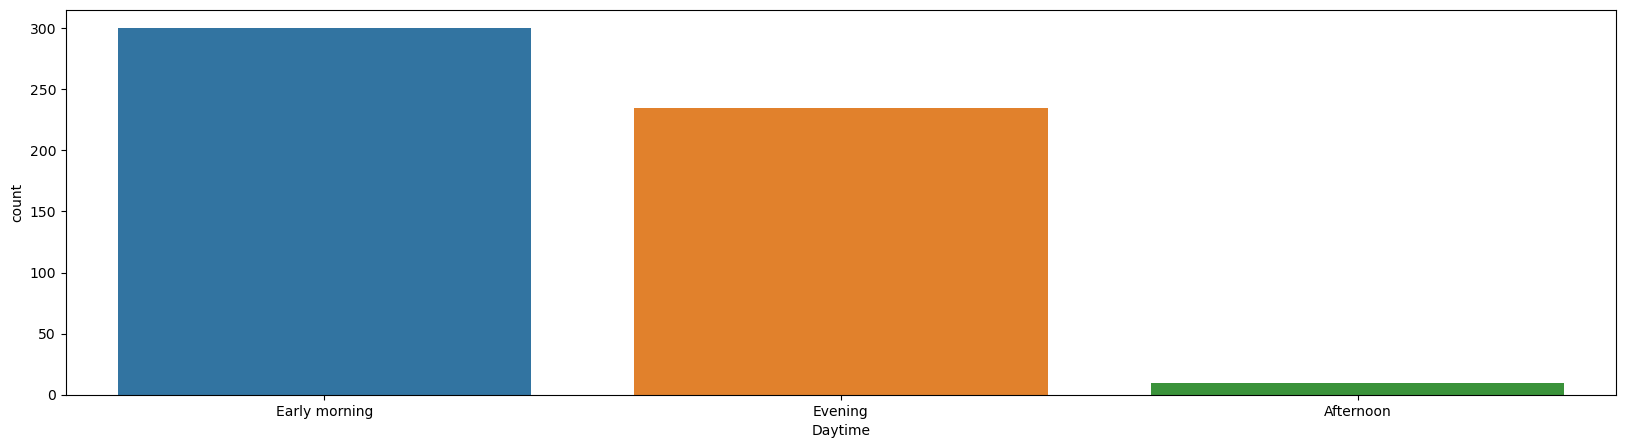

In [13]:
counter = plt.subplots(figsize=(20, 5))
sns.countplot(x='Daytime', data=fitness_df)
plt.show()

# Q4

In [14]:
Frequency_counts = pd.DataFrame(fitness_df[['Frequency']].value_counts(), columns = ['count'])
Frequency_counts

,count
Frequency,
1 to 2 times a week,148
Never,124
2 to 3 times a week,78
3 to 4 times a week,77
Everyday,69
5 to 6 times a week,49


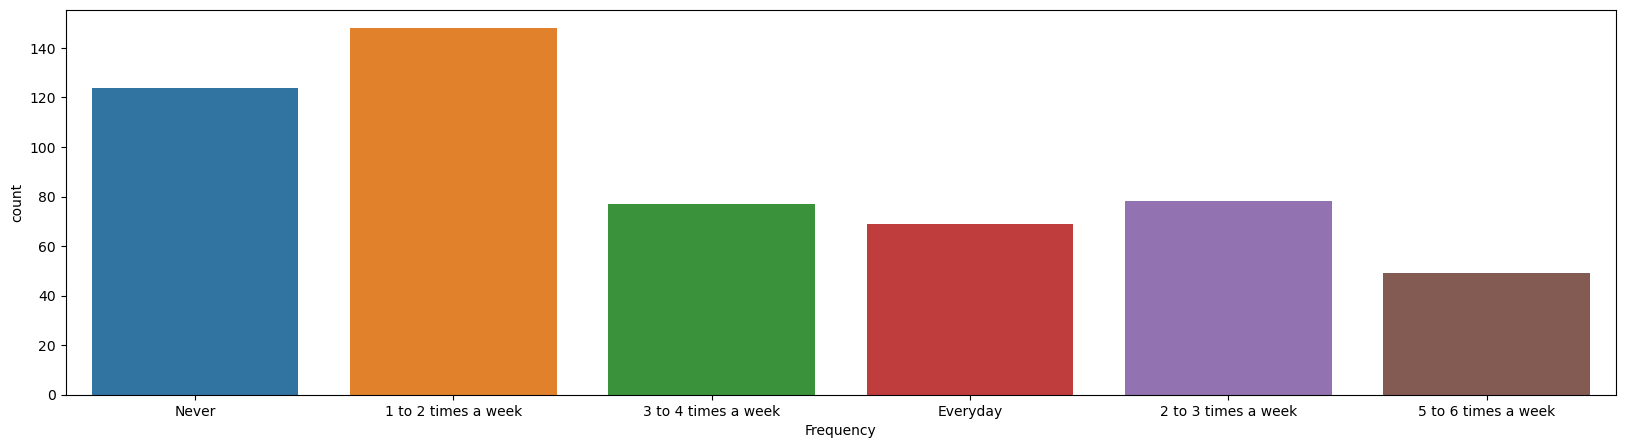

In [15]:
counter = plt.subplots(figsize=(20, 5))
sns.countplot(x='Frequency', data=fitness_df)
plt.show()

# Q5

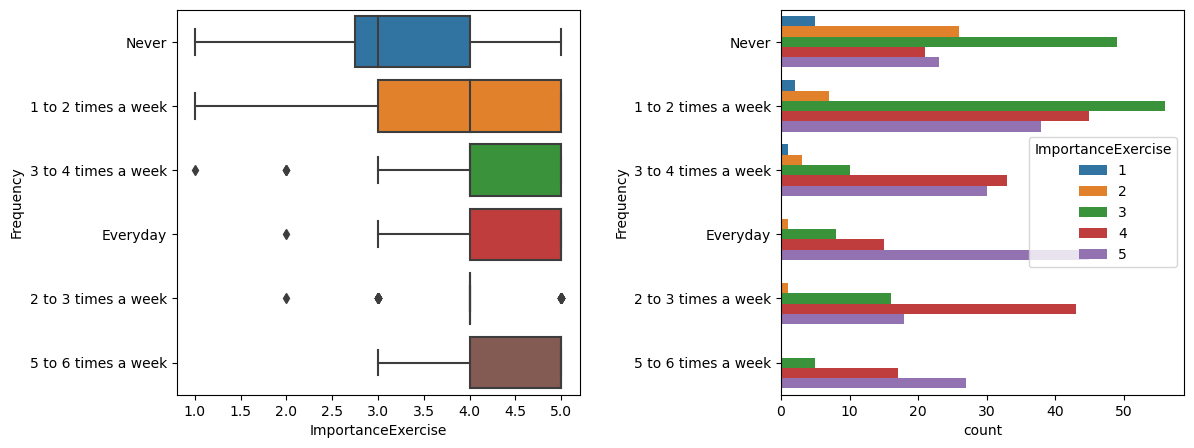

In [37]:
fi, axes = plt.subplots(figsize=(13,5), ncols=2)
plt.subplots_adjust(wspace=0.5)
sns.boxplot(ax=axes[0], y='Frequency', x='ImportanceExercise', data=fitness_df);
sns.countplot(ax=axes[1], y='Frequency', hue= 'ImportanceExercise' , data=fitness_df)
plt.show()

The difference between the illustrations:

In the figure on the left you can see a box diagram that represents how important training is for each group of trainees according to weekly training frequency, it can also be concluded that as the weekly training frequency increases, the importance of training also increases and also what unusual answers are given at each training frequency.

On the other hand, in the figure on the right, you can see how many people voted for each level of importance of training divided by the level of frequency of training, it can also be concluded from the figure that an increase in the frequency of training brings with it an increase in the importance of training and also the number of respondents who chose each level of importance.